# PBMC (Yale) 

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

In [1]:
import scanpy as sc
import numpy as np
from ndreamer import NDreamer

In [2]:
adata = sc.read_h5ad('../data/PBMC_yale_preprocessed.h5ad')
print(adata)
print('perturbation',np.unique(adata.obs['perturbation']))
print('batch',np.unique(adata.obs['batch'],return_counts=True))
print('cell_type0528',np.unique(adata.obs['cell_type0528']))
print(adata.X[:10,:10])

AnnData object with n_obs × n_vars = 5027 × 773
    obs: 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'cell_type0528'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type0528_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
perturbation ['IFNb' 'No stimulation']
batch (array(['H3D2'], dtype=object), array([5027]))
cell_type0528 ['B' 'CD4 T' 'CD8 T' 'Dendritic' 'Monocyte' 'NK' 'Plasma']
[[-0.11865562 -0.17559336 -0.13184807 -0.15251128 -0.24557106 -0.38421327
  -0.2019245  -0.13745788 -0.23247382 -0.08626232]
 [-0.13325824 -0.20568384 -0.14286487 -0.16371657 -0.2607082  -0.2985558
  -0.20685168 -0.15235388 -0.23922235 -0.10109032]
 [-0.15649903  4.662776   -0.13260117 -0.15959612 -0.27189648  5.3158584
   5.4904

In [3]:
adata = adata[adata.obs['perturbation'].isin(['No stimulation','IFNb'])]
adata=adata[adata.obs['batch'].isin(['H3D2'])]
print(adata)
adata=adata.copy()
adata.write("../data/PBMC_yale_preprocessed.h5ad")

View of AnnData object with n_obs × n_vars = 5027 × 773
    obs: 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'cell_type0528'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type0528_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [4]:
print(np.unique(adata.obs['batch']))

['H3D2']


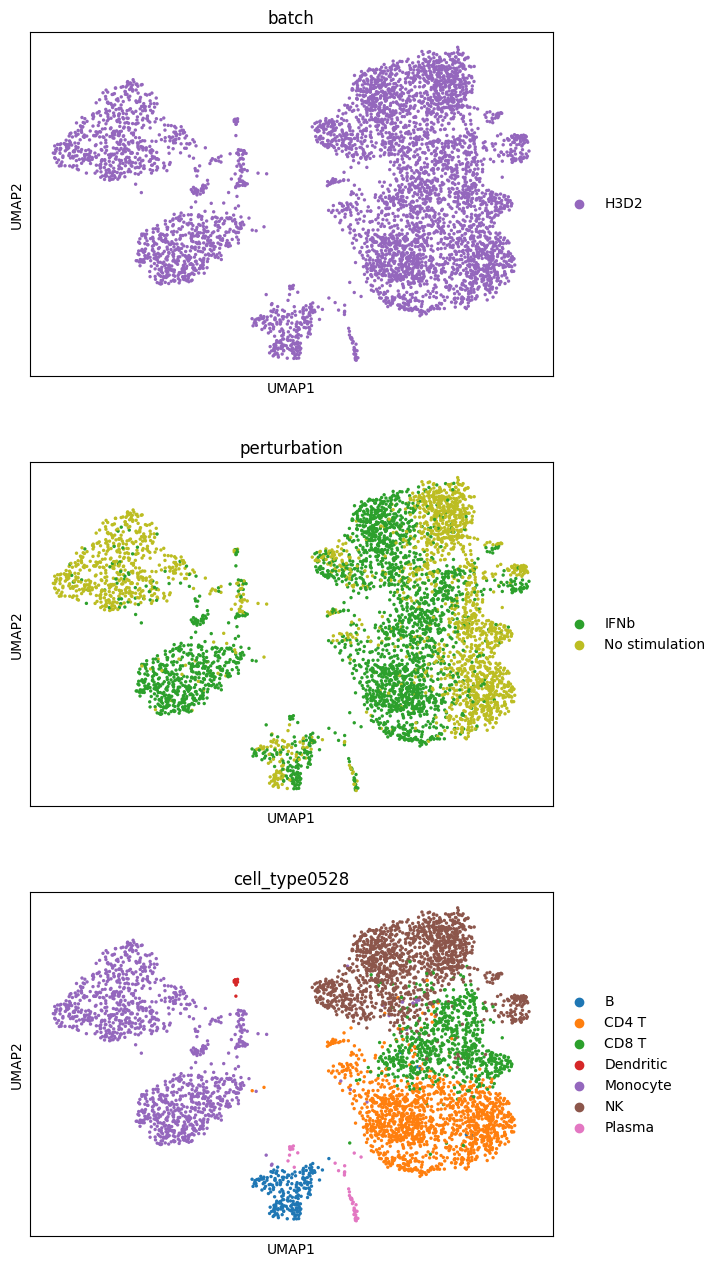

In [5]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=['batch','perturbation','cell_type0528'],ncols=1)

In [6]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='No stimulation', num_hvg=733, require_batch=True,
                            batch_key='batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./PBMC_yale/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./PBMC_yale/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20, have_negative_data=True)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[batch] back up to adata.obs['batch_backup']
Original adata.obs[perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'No stimulation': 0, 'IFNb': 1}
Condition mapping to adata.obs['batch']: {'batch': {'H3D2': 0}}
Unique batch mapping: {'H3D2': 0}
Calculating the clusters
Unique groups: ['0_IFNb' '0_No stimulation']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:38: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  clustering_function(adata, resolution=resolution1)


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:100: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = clustered_adatas[0].concatenate(*clustered_adatas[1:], batch_key="batch_condition",


Finished clustering
Data preprocessing done
Remaining number of cells: 5027
Require batch: True
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {'H3D2': 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'No stimulation': 0, 'IFNb': 1}
Preprocessing time: 4.27858 seconds


Overall Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1/100 | All Loss: 139.5141 | Neighborhood Loss: 54.3224 | Triplet Loss: 57.6030 | Reconstruction Loss: 20.3568 | Independent Loss: 15.7198 | KL Loss: 0.3578 | Commitment Loss: 0.5899 | Dependent Loss: -9.4355


Epoch: 2/100 | All Loss: 125.0201 | Neighborhood Loss: 59.3302 | Triplet Loss: 39.4840 | Reconstruction Loss: 18.5044 | Independent Loss: 16.5367 | KL Loss: 0.3390 | Commitment Loss: 0.5862 | Dependent Loss: -9.7604


Epoch: 3/100 | All Loss: 117.6486 | Neighborhood Loss: 61.6253 | Triplet Loss: 29.2010 | Reconstruction Loss: 18.2102 | Independent Loss: 17.5841 | KL Loss: 0.3602 | Commitment Loss: 0.5870 | Dependent Loss: -9.9192


Epoch: 4/100 | All Loss: 116.0791 | Neighborhood Loss: 66.1944 | Triplet Loss: 22.8325 | Reconstruction Loss: 18.0299 | Independent Loss: 18.0563 | KL Loss: 0.3619 | Commitment Loss: 0.5804 | Dependent Loss: -9.9764


Epoch: 5/100 | All Loss: 110.2070 | Neighborhood Loss: 64.7654 | Triplet Loss: 20.2154 | Reconstruction Loss: 17.6665 | Independent Loss: 16.8432 | KL Loss: 0.3408 | Commitment Loss: 0.5799 | Dependent Loss: -10.2042


Epoch: 6/100 | All Loss: 104.2229 | Neighborhood Loss: 63.0073 | Triplet Loss: 16.6594 | Reconstruction Loss: 17.4905 | Independent Loss: 16.4688 | KL Loss: 0.3052 | Commitment Loss: 0.5802 | Dependent Loss: -10.2884


Epoch: 7/100 | All Loss: 100.3130 | Neighborhood Loss: 62.0951 | Triplet Loss: 15.7317 | Reconstruction Loss: 17.2193 | Independent Loss: 14.7922 | KL Loss: 0.2733 | Commitment Loss: 0.5793 | Dependent Loss: -10.3779


Epoch: 8/100 | All Loss: 92.7755 | Neighborhood Loss: 58.5364 | Triplet Loss: 13.1195 | Reconstruction Loss: 16.7868 | Independent Loss: 14.0273 | KL Loss: 0.2541 | Commitment Loss: 0.5747 | Dependent Loss: -10.5234


Epoch: 9/100 | All Loss: 89.9915 | Neighborhood Loss: 59.9029 | Triplet Loss: 10.5748 | Reconstruction Loss: 16.5469 | Independent Loss: 12.6485 | KL Loss: 0.2394 | Commitment Loss: 0.5695 | Dependent Loss: -10.4904


Epoch: 10/100 | All Loss: 83.5187 | Neighborhood Loss: 55.1720 | Triplet Loss: 10.4002 | Reconstruction Loss: 16.3334 | Independent Loss: 11.3298 | KL Loss: 0.2308 | Commitment Loss: 0.5718 | Dependent Loss: -10.5193


Epoch: 11/100 | All Loss: 85.3195 | Neighborhood Loss: 58.3082 | Triplet Loss: 9.8122 | Reconstruction Loss: 16.1184 | Independent Loss: 10.8311 | KL Loss: 0.2260 | Commitment Loss: 0.5709 | Dependent Loss: -10.5472


Epoch: 12/100 | All Loss: 80.5013 | Neighborhood Loss: 55.5123 | Triplet Loss: 9.7957 | Reconstruction Loss: 15.8874 | Independent Loss: 9.1264 | KL Loss: 0.2226 | Commitment Loss: 0.5750 | Dependent Loss: -10.6181


Epoch: 13/100 | All Loss: 80.7504 | Neighborhood Loss: 56.0741 | Triplet Loss: 10.3293 | Reconstruction Loss: 15.7054 | Independent Loss: 8.4285 | KL Loss: 0.2237 | Commitment Loss: 0.5730 | Dependent Loss: -10.5835


Epoch: 14/100 | All Loss: 75.2636 | Neighborhood Loss: 53.3815 | Triplet Loss: 7.8757 | Reconstruction Loss: 15.6324 | Independent Loss: 8.1445 | KL Loss: 0.2279 | Commitment Loss: 0.5736 | Dependent Loss: -10.5720


Resetting 717 unused embeddings.
Resetting 686 unused embeddings.
Resetting 696 unused embeddings.
Resetting 690 unused embeddings.


Resetting 735 unused embeddings.
Resetting 675 unused embeddings.
Resetting 775 unused embeddings.
Resetting 685 unused embeddings.


Resetting 707 unused embeddings.
Resetting 734 unused embeddings.
Resetting 684 unused embeddings.
Resetting 706 unused embeddings.


Resetting 679 unused embeddings.
Resetting 691 unused embeddings.
Resetting 673 unused embeddings.
Resetting 686 unused embeddings.


Resetting 709 unused embeddings.
Resetting 742 unused embeddings.
Resetting 740 unused embeddings.
Resetting 704 unused embeddings.


Resetting 728 unused embeddings.
Resetting 730 unused embeddings.
Resetting 749 unused embeddings.
Resetting 680 unused embeddings.


Resetting 730 unused embeddings.
Resetting 704 unused embeddings.
Resetting 732 unused embeddings.
Resetting 752 unused embeddings.


Resetting 707 unused embeddings.
Resetting 695 unused embeddings.
Resetting 743 unused embeddings.
Resetting 771 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/100 | All Loss: 35.9087 | Neighborhood Loss: 25.3183 | Triplet Loss: 4.2461 | Reconstruction Loss: 7.7303 | Independent Loss: 3.6111 | KL Loss: 0.1149 | Commitment Loss: 0.2870 | Dependent Loss: -5.3990


Epoch: 16/100 | All Loss: 81.8094 | Neighborhood Loss: 58.4099 | Triplet Loss: 11.4884 | Reconstruction Loss: 15.5502 | Independent Loss: 4.0879 | KL Loss: 0.2015 | Commitment Loss: 0.3655 | Dependent Loss: -8.2939


Epoch: 17/100 | All Loss: 79.7025 | Neighborhood Loss: 57.9524 | Triplet Loss: 10.1771 | Reconstruction Loss: 15.6233 | Independent Loss: 3.6473 | KL Loss: 0.1983 | Commitment Loss: 0.3591 | Dependent Loss: -8.2550


Epoch: 18/100 | All Loss: 77.6738 | Neighborhood Loss: 56.1894 | Triplet Loss: 9.7824 | Reconstruction Loss: 15.5451 | Independent Loss: 3.7751 | KL Loss: 0.1934 | Commitment Loss: 0.3604 | Dependent Loss: -8.1720


Epoch: 19/100 | All Loss: 77.2190 | Neighborhood Loss: 55.5130 | Triplet Loss: 10.1618 | Reconstruction Loss: 15.5219 | Independent Loss: 3.6504 | KL Loss: 0.1880 | Commitment Loss: 0.3610 | Dependent Loss: -8.1771


Epoch: 20/100 | All Loss: 73.6535 | Neighborhood Loss: 54.0615 | Triplet Loss: 8.3969 | Reconstruction Loss: 15.6275 | Independent Loss: 3.1617 | KL Loss: 0.1827 | Commitment Loss: 0.3611 | Dependent Loss: -8.1379


Epoch: 21/100 | All Loss: 73.4846 | Neighborhood Loss: 53.5262 | Triplet Loss: 9.1333 | Reconstruction Loss: 15.5864 | Independent Loss: 3.0411 | KL Loss: 0.1857 | Commitment Loss: 0.3632 | Dependent Loss: -8.3514


Epoch: 22/100 | All Loss: 74.6997 | Neighborhood Loss: 56.4263 | Triplet Loss: 6.6892 | Reconstruction Loss: 15.6621 | Independent Loss: 3.6033 | KL Loss: 0.1857 | Commitment Loss: 0.3646 | Dependent Loss: -8.2315


Epoch: 23/100 | All Loss: 71.3894 | Neighborhood Loss: 53.7277 | Triplet Loss: 6.4354 | Reconstruction Loss: 15.4159 | Independent Loss: 3.4462 | KL Loss: 0.1854 | Commitment Loss: 0.3651 | Dependent Loss: -8.1863


Epoch: 24/100 | All Loss: 73.0701 | Neighborhood Loss: 54.4778 | Triplet Loss: 7.9266 | Reconstruction Loss: 15.4821 | Independent Loss: 2.8403 | KL Loss: 0.1832 | Commitment Loss: 0.3664 | Dependent Loss: -8.2062


Epoch: 25/100 | All Loss: 70.7144 | Neighborhood Loss: 53.2991 | Triplet Loss: 6.3864 | Reconstruction Loss: 15.5368 | Independent Loss: 3.2503 | KL Loss: 0.1845 | Commitment Loss: 0.3651 | Dependent Loss: -8.3078


Epoch: 26/100 | All Loss: 68.9283 | Neighborhood Loss: 51.2090 | Triplet Loss: 6.8699 | Reconstruction Loss: 15.7004 | Independent Loss: 2.7962 | KL Loss: 0.1839 | Commitment Loss: 0.3649 | Dependent Loss: -8.1959


Epoch: 27/100 | All Loss: 65.4036 | Neighborhood Loss: 50.0860 | Triplet Loss: 5.1210 | Reconstruction Loss: 15.3098 | Independent Loss: 2.8721 | KL Loss: 0.1882 | Commitment Loss: 0.3734 | Dependent Loss: -8.5470


Epoch: 28/100 | All Loss: 71.3676 | Neighborhood Loss: 52.4356 | Triplet Loss: 7.5799 | Reconstruction Loss: 15.5680 | Independent Loss: 3.3932 | KL Loss: 0.1801 | Commitment Loss: 0.3635 | Dependent Loss: -8.1526


Epoch: 29/100 | All Loss: 67.7089 | Neighborhood Loss: 51.8574 | Triplet Loss: 5.6412 | Reconstruction Loss: 15.4936 | Independent Loss: 2.5447 | KL Loss: 0.1795 | Commitment Loss: 0.3676 | Dependent Loss: -8.3750


Resetting 706 unused embeddings.
Resetting 693 unused embeddings.
Resetting 735 unused embeddings.
Resetting 677 unused embeddings.


Resetting 702 unused embeddings.
Resetting 682 unused embeddings.
Resetting 782 unused embeddings.
Resetting 686 unused embeddings.


Resetting 723 unused embeddings.
Resetting 713 unused embeddings.
Resetting 699 unused embeddings.
Resetting 695 unused embeddings.


Resetting 684 unused embeddings.
Resetting 679 unused embeddings.
Resetting 647 unused embeddings.
Resetting 716 unused embeddings.


Resetting 740 unused embeddings.
Resetting 742 unused embeddings.
Resetting 723 unused embeddings.
Resetting 727 unused embeddings.


Resetting 698 unused embeddings.
Resetting 721 unused embeddings.
Resetting 730 unused embeddings.
Resetting 715 unused embeddings.


Resetting 703 unused embeddings.
Resetting 700 unused embeddings.
Resetting 699 unused embeddings.
Resetting 745 unused embeddings.


Resetting 707 unused embeddings.
Resetting 698 unused embeddings.
Resetting 688 unused embeddings.
Resetting 748 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/100 | All Loss: 33.2208 | Neighborhood Loss: 25.6843 | Triplet Loss: 2.5507 | Reconstruction Loss: 7.6961 | Independent Loss: 1.1847 | KL Loss: 0.0889 | Commitment Loss: 0.1878 | Dependent Loss: -4.1718


Epoch: 31/100 | All Loss: 67.6975 | Neighborhood Loss: 52.2723 | Triplet Loss: 5.4761 | Reconstruction Loss: 15.4889 | Independent Loss: 2.6300 | KL Loss: 0.1666 | Commitment Loss: 0.3193 | Dependent Loss: -8.6559


Epoch: 32/100 | All Loss: 69.4320 | Neighborhood Loss: 51.8465 | Triplet Loss: 7.1417 | Reconstruction Loss: 15.6450 | Independent Loss: 2.8959 | KL Loss: 0.1659 | Commitment Loss: 0.3229 | Dependent Loss: -8.5858


Epoch: 33/100 | All Loss: 67.2359 | Neighborhood Loss: 51.5509 | Triplet Loss: 5.5914 | Reconstruction Loss: 15.6323 | Independent Loss: 2.7598 | KL Loss: 0.1631 | Commitment Loss: 0.3194 | Dependent Loss: -8.7809


Epoch: 34/100 | All Loss: 65.5476 | Neighborhood Loss: 51.4777 | Triplet Loss: 4.3080 | Reconstruction Loss: 15.4873 | Independent Loss: 2.5332 | KL Loss: 0.1602 | Commitment Loss: 0.3150 | Dependent Loss: -8.7338


Epoch: 35/100 | All Loss: 63.1062 | Neighborhood Loss: 48.5118 | Triplet Loss: 4.5644 | Reconstruction Loss: 15.4983 | Independent Loss: 2.8476 | KL Loss: 0.1607 | Commitment Loss: 0.3188 | Dependent Loss: -8.7954


Epoch: 36/100 | All Loss: 66.7266 | Neighborhood Loss: 51.1088 | Triplet Loss: 5.6415 | Reconstruction Loss: 15.4350 | Independent Loss: 2.7384 | KL Loss: 0.1636 | Commitment Loss: 0.3185 | Dependent Loss: -8.6791


Epoch: 37/100 | All Loss: 64.9494 | Neighborhood Loss: 48.3627 | Triplet Loss: 6.1554 | Reconstruction Loss: 15.5312 | Independent Loss: 3.0616 | KL Loss: 0.1656 | Commitment Loss: 0.3185 | Dependent Loss: -8.6456


Epoch: 38/100 | All Loss: 63.8249 | Neighborhood Loss: 49.3099 | Triplet Loss: 4.5175 | Reconstruction Loss: 15.5816 | Independent Loss: 2.8017 | KL Loss: 0.1684 | Commitment Loss: 0.3199 | Dependent Loss: -8.8741


Epoch: 39/100 | All Loss: 63.8177 | Neighborhood Loss: 48.7150 | Triplet Loss: 5.4717 | Reconstruction Loss: 15.5025 | Independent Loss: 2.4240 | KL Loss: 0.1679 | Commitment Loss: 0.3178 | Dependent Loss: -8.7812


Epoch: 40/100 | All Loss: 66.4921 | Neighborhood Loss: 51.6032 | Triplet Loss: 5.1134 | Reconstruction Loss: 15.3510 | Independent Loss: 2.7138 | KL Loss: 0.1675 | Commitment Loss: 0.3201 | Dependent Loss: -8.7767


Epoch: 41/100 | All Loss: 65.6767 | Neighborhood Loss: 50.2200 | Triplet Loss: 5.7142 | Reconstruction Loss: 15.5199 | Independent Loss: 2.5245 | KL Loss: 0.1669 | Commitment Loss: 0.3193 | Dependent Loss: -8.7879


Epoch: 42/100 | All Loss: 66.0929 | Neighborhood Loss: 51.4375 | Triplet Loss: 5.2174 | Reconstruction Loss: 15.5751 | Independent Loss: 2.2431 | KL Loss: 0.1646 | Commitment Loss: 0.3182 | Dependent Loss: -8.8629


Epoch: 43/100 | All Loss: 60.3303 | Neighborhood Loss: 46.3631 | Triplet Loss: 4.5316 | Reconstruction Loss: 15.5686 | Independent Loss: 2.2211 | KL Loss: 0.1669 | Commitment Loss: 0.3214 | Dependent Loss: -8.8425


Epoch: 44/100 | All Loss: 60.7670 | Neighborhood Loss: 45.0616 | Triplet Loss: 6.1811 | Reconstruction Loss: 15.5060 | Independent Loss: 2.4033 | KL Loss: 0.1665 | Commitment Loss: 0.3197 | Dependent Loss: -8.8713


Resetting 687 unused embeddings.
Resetting 667 unused embeddings.
Resetting 713 unused embeddings.
Resetting 667 unused embeddings.


Resetting 664 unused embeddings.
Resetting 662 unused embeddings.
Resetting 761 unused embeddings.
Resetting 676 unused embeddings.


Resetting 702 unused embeddings.
Resetting 681 unused embeddings.
Resetting 691 unused embeddings.
Resetting 685 unused embeddings.


Resetting 651 unused embeddings.
Resetting 667 unused embeddings.
Resetting 646 unused embeddings.
Resetting 699 unused embeddings.


Resetting 712 unused embeddings.
Resetting 717 unused embeddings.
Resetting 704 unused embeddings.
Resetting 707 unused embeddings.


Resetting 708 unused embeddings.
Resetting 706 unused embeddings.
Resetting 710 unused embeddings.
Resetting 666 unused embeddings.


Resetting 682 unused embeddings.
Resetting 690 unused embeddings.
Resetting 702 unused embeddings.
Resetting 697 unused embeddings.


Resetting 704 unused embeddings.
Resetting 669 unused embeddings.
Resetting 685 unused embeddings.
Resetting 742 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 44
Epoch: 45/100 | All Loss: 32.3979 | Neighborhood Loss: 24.6166 | Triplet Loss: 2.9579 | Reconstruction Loss: 7.7492 | Independent Loss: 1.2496 | KL Loss: 0.0854 | Commitment Loss: 0.1620 | Dependent Loss: -4.4227


Epoch: 46/100 | All Loss: 62.3018 | Neighborhood Loss: 47.3605 | Triplet Loss: 5.6794 | Reconstruction Loss: 15.5848 | Independent Loss: 2.1990 | KL Loss: 0.1583 | Commitment Loss: 0.2872 | Dependent Loss: -8.9674


Epoch: 47/100 | All Loss: 64.0081 | Neighborhood Loss: 49.2273 | Triplet Loss: 5.2748 | Reconstruction Loss: 15.5060 | Independent Loss: 2.4892 | KL Loss: 0.1587 | Commitment Loss: 0.2856 | Dependent Loss: -8.9336


Epoch: 48/100 | All Loss: 61.1313 | Neighborhood Loss: 46.5781 | Triplet Loss: 5.0804 | Reconstruction Loss: 15.5916 | Independent Loss: 2.4059 | KL Loss: 0.1586 | Commitment Loss: 0.2858 | Dependent Loss: -8.9691


Epoch: 49/100 | All Loss: 63.4290 | Neighborhood Loss: 48.5136 | Triplet Loss: 5.1510 | Reconstruction Loss: 15.5190 | Independent Loss: 2.7008 | KL Loss: 0.1544 | Commitment Loss: 0.2819 | Dependent Loss: -8.8918


Epoch: 50/100 | All Loss: 63.7635 | Neighborhood Loss: 48.3918 | Triplet Loss: 5.8571 | Reconstruction Loss: 15.3841 | Independent Loss: 2.6939 | KL Loss: 0.1577 | Commitment Loss: 0.2876 | Dependent Loss: -9.0086


Epoch: 51/100 | All Loss: 61.4495 | Neighborhood Loss: 47.5968 | Triplet Loss: 4.8045 | Reconstruction Loss: 15.3721 | Independent Loss: 2.1608 | KL Loss: 0.1554 | Commitment Loss: 0.2851 | Dependent Loss: -8.9252


Epoch: 52/100 | All Loss: 64.1947 | Neighborhood Loss: 50.3151 | Triplet Loss: 4.6521 | Reconstruction Loss: 15.3791 | Independent Loss: 2.4668 | KL Loss: 0.1566 | Commitment Loss: 0.2859 | Dependent Loss: -9.0608


Epoch: 53/100 | All Loss: 61.5229 | Neighborhood Loss: 47.3510 | Triplet Loss: 4.6898 | Reconstruction Loss: 15.4774 | Independent Loss: 2.7001 | KL Loss: 0.1546 | Commitment Loss: 0.2821 | Dependent Loss: -9.1321


Epoch: 54/100 | All Loss: 62.9473 | Neighborhood Loss: 47.3540 | Triplet Loss: 6.4183 | Reconstruction Loss: 15.6532 | Independent Loss: 1.9593 | KL Loss: 0.1542 | Commitment Loss: 0.2852 | Dependent Loss: -8.8768


Epoch: 55/100 | All Loss: 59.3147 | Neighborhood Loss: 45.4740 | Triplet Loss: 4.7153 | Reconstruction Loss: 15.4431 | Independent Loss: 2.5215 | KL Loss: 0.1598 | Commitment Loss: 0.2877 | Dependent Loss: -9.2868


Epoch: 56/100 | All Loss: 62.6729 | Neighborhood Loss: 50.3116 | Triplet Loss: 3.5168 | Reconstruction Loss: 15.5149 | Independent Loss: 1.9803 | KL Loss: 0.1555 | Commitment Loss: 0.2854 | Dependent Loss: -9.0915


Epoch: 57/100 | All Loss: 62.0615 | Neighborhood Loss: 47.9579 | Triplet Loss: 5.0440 | Reconstruction Loss: 15.3576 | Independent Loss: 2.3514 | KL Loss: 0.1570 | Commitment Loss: 0.2870 | Dependent Loss: -9.0935


Epoch: 58/100 | All Loss: 61.1981 | Neighborhood Loss: 47.2114 | Triplet Loss: 4.9755 | Reconstruction Loss: 15.4386 | Independent Loss: 2.1545 | KL Loss: 0.1593 | Commitment Loss: 0.2884 | Dependent Loss: -9.0294


Epoch: 59/100 | All Loss: 62.9773 | Neighborhood Loss: 49.9279 | Triplet Loss: 3.9151 | Reconstruction Loss: 15.4949 | Independent Loss: 2.3633 | KL Loss: 0.1571 | Commitment Loss: 0.2866 | Dependent Loss: -9.1677


Resetting 678 unused embeddings.
Resetting 661 unused embeddings.
Resetting 704 unused embeddings.
Resetting 677 unused embeddings.


Resetting 665 unused embeddings.
Resetting 669 unused embeddings.
Resetting 764 unused embeddings.
Resetting 662 unused embeddings.


Resetting 691 unused embeddings.
Resetting 675 unused embeddings.
Resetting 687 unused embeddings.
Resetting 691 unused embeddings.


Resetting 652 unused embeddings.
Resetting 675 unused embeddings.
Resetting 643 unused embeddings.
Resetting 701 unused embeddings.


Resetting 684 unused embeddings.
Resetting 709 unused embeddings.
Resetting 715 unused embeddings.
Resetting 699 unused embeddings.


Resetting 719 unused embeddings.
Resetting 695 unused embeddings.
Resetting 714 unused embeddings.
Resetting 644 unused embeddings.


Resetting 673 unused embeddings.
Resetting 680 unused embeddings.
Resetting 705 unused embeddings.
Resetting 672 unused embeddings.


Resetting 694 unused embeddings.
Resetting 668 unused embeddings.
Resetting 679 unused embeddings.
Resetting 734 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 59
Epoch: 60/100 | All Loss: 30.9408 | Neighborhood Loss: 24.2488 | Triplet Loss: 1.9745 | Reconstruction Loss: 7.6839 | Independent Loss: 1.4373 | KL Loss: 0.0794 | Commitment Loss: 0.1454 | Dependent Loss: -4.6285


Epoch: 61/100 | All Loss: 61.5497 | Neighborhood Loss: 49.4579 | Triplet Loss: 3.4925 | Reconstruction Loss: 15.3344 | Independent Loss: 2.1567 | KL Loss: 0.1566 | Commitment Loss: 0.2751 | Dependent Loss: -9.3235


Epoch: 62/100 | All Loss: 60.0196 | Neighborhood Loss: 46.0515 | Triplet Loss: 4.9617 | Reconstruction Loss: 15.5315 | Independent Loss: 2.3661 | KL Loss: 0.1538 | Commitment Loss: 0.2744 | Dependent Loss: -9.3194


Epoch: 63/100 | All Loss: 62.0814 | Neighborhood Loss: 48.9779 | Triplet Loss: 4.8168 | Reconstruction Loss: 15.3502 | Independent Loss: 1.9386 | KL Loss: 0.1533 | Commitment Loss: 0.2758 | Dependent Loss: -9.4312


Epoch: 64/100 | All Loss: 62.4920 | Neighborhood Loss: 50.3065 | Triplet Loss: 4.0320 | Reconstruction Loss: 15.2254 | Independent Loss: 1.8717 | KL Loss: 0.1518 | Commitment Loss: 0.2707 | Dependent Loss: -9.3661


Epoch: 65/100 | All Loss: 59.7952 | Neighborhood Loss: 47.1235 | Triplet Loss: 4.3267 | Reconstruction Loss: 15.3457 | Independent Loss: 1.8802 | KL Loss: 0.1517 | Commitment Loss: 0.2722 | Dependent Loss: -9.3049


Epoch: 66/100 | All Loss: 60.5859 | Neighborhood Loss: 46.8720 | Triplet Loss: 4.9815 | Reconstruction Loss: 15.3205 | Independent Loss: 2.2890 | KL Loss: 0.1509 | Commitment Loss: 0.2703 | Dependent Loss: -9.2984


Epoch: 67/100 | All Loss: 62.0610 | Neighborhood Loss: 49.0528 | Triplet Loss: 4.4156 | Reconstruction Loss: 15.4542 | Independent Loss: 1.9495 | KL Loss: 0.1479 | Commitment Loss: 0.2710 | Dependent Loss: -9.2301


Epoch: 68/100 | All Loss: 61.6481 | Neighborhood Loss: 48.5600 | Triplet Loss: 4.6235 | Reconstruction Loss: 15.2960 | Independent Loss: 2.0039 | KL Loss: 0.1511 | Commitment Loss: 0.2760 | Dependent Loss: -9.2624


Epoch: 69/100 | All Loss: 61.4126 | Neighborhood Loss: 47.8476 | Triplet Loss: 4.1363 | Reconstruction Loss: 15.2453 | Independent Loss: 2.9023 | KL Loss: 0.1514 | Commitment Loss: 0.2756 | Dependent Loss: -9.1459


Epoch: 70/100 | All Loss: 62.8865 | Neighborhood Loss: 49.0007 | Triplet Loss: 4.8872 | Reconstruction Loss: 15.3123 | Independent Loss: 2.4898 | KL Loss: 0.1488 | Commitment Loss: 0.2712 | Dependent Loss: -9.2235


Epoch: 71/100 | All Loss: 61.5438 | Neighborhood Loss: 49.1833 | Triplet Loss: 3.7866 | Reconstruction Loss: 15.3808 | Independent Loss: 2.0217 | KL Loss: 0.1478 | Commitment Loss: 0.2756 | Dependent Loss: -9.2520


Epoch: 72/100 | All Loss: 62.7773 | Neighborhood Loss: 47.4672 | Triplet Loss: 5.7974 | Reconstruction Loss: 15.4245 | Independent Loss: 2.6855 | KL Loss: 0.1446 | Commitment Loss: 0.2706 | Dependent Loss: -9.0125


Epoch: 73/100 | All Loss: 60.6615 | Neighborhood Loss: 48.7531 | Triplet Loss: 3.9151 | Reconstruction Loss: 15.2052 | Independent Loss: 1.7689 | KL Loss: 0.1531 | Commitment Loss: 0.2801 | Dependent Loss: -9.4140


Epoch: 74/100 | All Loss: 60.0419 | Neighborhood Loss: 47.2401 | Triplet Loss: 4.5329 | Reconstruction Loss: 15.1737 | Independent Loss: 1.9857 | KL Loss: 0.1516 | Commitment Loss: 0.2807 | Dependent Loss: -9.3228


Resetting 673 unused embeddings.
Resetting 659 unused embeddings.
Resetting 689 unused embeddings.
Resetting 686 unused embeddings.


Resetting 664 unused embeddings.
Resetting 671 unused embeddings.
Resetting 761 unused embeddings.
Resetting 663 unused embeddings.


Resetting 682 unused embeddings.
Resetting 676 unused embeddings.
Resetting 688 unused embeddings.
Resetting 695 unused embeddings.


Resetting 657 unused embeddings.
Resetting 683 unused embeddings.
Resetting 641 unused embeddings.
Resetting 711 unused embeddings.


Resetting 683 unused embeddings.
Resetting 711 unused embeddings.
Resetting 705 unused embeddings.
Resetting 687 unused embeddings.


Resetting 724 unused embeddings.
Resetting 691 unused embeddings.
Resetting 717 unused embeddings.
Resetting 635 unused embeddings.


Resetting 651 unused embeddings.
Resetting 677 unused embeddings.
Resetting 713 unused embeddings.


Resetting 676 unused embeddings.
Resetting 681 unused embeddings.
Resetting 671 unused embeddings.
Resetting 683 unused embeddings.


Resetting 720 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 74
Epoch: 75/100 | All Loss: 29.4908 | Neighborhood Loss: 23.0160 | Triplet Loss: 1.9248 | Reconstruction Loss: 7.6949 | Independent Loss: 1.2440 | KL Loss: 0.0751 | Commitment Loss: 0.1406 | Dependent Loss: -4.6047


Epoch: 76/100 | All Loss: 61.0254 | Neighborhood Loss: 47.9119 | Triplet Loss: 4.7185 | Reconstruction Loss: 15.3133 | Independent Loss: 2.1026 | KL Loss: 0.1493 | Commitment Loss: 0.2607 | Dependent Loss: -9.4309


Epoch: 77/100 | All Loss: 60.2983 | Neighborhood Loss: 48.6049 | Triplet Loss: 3.3091 | Reconstruction Loss: 15.1887 | Independent Loss: 2.2478 | KL Loss: 0.1543 | Commitment Loss: 0.2634 | Dependent Loss: -9.4699


Epoch: 78/100 | All Loss: 59.0031 | Neighborhood Loss: 47.0568 | Triplet Loss: 3.4882 | Reconstruction Loss: 15.2814 | Independent Loss: 2.1903 | KL Loss: 0.1549 | Commitment Loss: 0.2634 | Dependent Loss: -9.4319


Epoch: 79/100 | All Loss: 61.0337 | Neighborhood Loss: 46.9809 | Triplet Loss: 5.4307 | Reconstruction Loss: 15.3092 | Independent Loss: 2.2578 | KL Loss: 0.1497 | Commitment Loss: 0.2585 | Dependent Loss: -9.3531


Epoch: 80/100 | All Loss: 59.7265 | Neighborhood Loss: 46.8805 | Triplet Loss: 4.2608 | Reconstruction Loss: 15.2589 | Independent Loss: 2.3188 | KL Loss: 0.1577 | Commitment Loss: 0.2673 | Dependent Loss: -9.4174


Epoch: 81/100 | All Loss: 58.3964 | Neighborhood Loss: 45.7052 | Triplet Loss: 4.5137 | Reconstruction Loss: 15.4597 | Independent Loss: 1.8092 | KL Loss: 0.1535 | Commitment Loss: 0.2585 | Dependent Loss: -9.5034


Epoch: 82/100 | All Loss: 62.5998 | Neighborhood Loss: 48.9052 | Triplet Loss: 4.7565 | Reconstruction Loss: 15.2938 | Independent Loss: 2.6122 | KL Loss: 0.1569 | Commitment Loss: 0.2569 | Dependent Loss: -9.3817


Epoch: 83/100 | All Loss: 59.4558 | Neighborhood Loss: 47.2504 | Triplet Loss: 3.9061 | Reconstruction Loss: 15.1548 | Independent Loss: 2.2915 | KL Loss: 0.1629 | Commitment Loss: 0.2605 | Dependent Loss: -9.5705


Epoch: 84/100 | All Loss: 60.5998 | Neighborhood Loss: 48.5088 | Triplet Loss: 4.2599 | Reconstruction Loss: 15.0638 | Independent Loss: 1.8308 | KL Loss: 0.1675 | Commitment Loss: 0.2601 | Dependent Loss: -9.4911


Epoch: 85/100 | All Loss: 58.1472 | Neighborhood Loss: 45.4209 | Triplet Loss: 4.6818 | Reconstruction Loss: 15.3207 | Independent Loss: 1.9090 | KL Loss: 0.1702 | Commitment Loss: 0.2650 | Dependent Loss: -9.6205


Epoch: 86/100 | All Loss: 59.1536 | Neighborhood Loss: 47.4061 | Triplet Loss: 3.7811 | Reconstruction Loss: 14.9086 | Independent Loss: 2.3355 | KL Loss: 0.1778 | Commitment Loss: 0.2711 | Dependent Loss: -9.7266


Epoch: 87/100 | All Loss: 57.0975 | Neighborhood Loss: 45.7665 | Triplet Loss: 3.4497 | Reconstruction Loss: 15.1027 | Independent Loss: 1.9033 | KL Loss: 0.1753 | Commitment Loss: 0.2636 | Dependent Loss: -9.5636


Epoch: 88/100 | All Loss: 61.5468 | Neighborhood Loss: 49.1479 | Triplet Loss: 4.0034 | Reconstruction Loss: 15.1461 | Independent Loss: 2.4945 | KL Loss: 0.1753 | Commitment Loss: 0.2688 | Dependent Loss: -9.6892


Epoch: 89/100 | All Loss: 58.3596 | Neighborhood Loss: 44.9273 | Triplet Loss: 5.7756 | Reconstruction Loss: 15.3038 | Independent Loss: 1.6063 | KL Loss: 0.1745 | Commitment Loss: 0.2622 | Dependent Loss: -9.6901


Resetting 668 unused embeddings.
Resetting 663 unused embeddings.
Resetting 686 unused embeddings.
Resetting 689 unused embeddings.


Resetting 667 unused embeddings.
Resetting 663 unused embeddings.
Resetting 766 unused embeddings.
Resetting 665 unused embeddings.


Resetting 684 unused embeddings.
Resetting 673 unused embeddings.
Resetting 698 unused embeddings.
Resetting 702 unused embeddings.


Resetting 658 unused embeddings.
Resetting 692 unused embeddings.
Resetting 643 unused embeddings.
Resetting 714 unused embeddings.


Resetting 678 unused embeddings.
Resetting 711 unused embeddings.
Resetting 694 unused embeddings.
Resetting 684 unused embeddings.


Resetting 726 unused embeddings.
Resetting 703 unused embeddings.
Resetting 716 unused embeddings.
Resetting 635 unused embeddings.


Resetting 654 unused embeddings.
Resetting 679 unused embeddings.
Resetting 712 unused embeddings.
Resetting 668 unused embeddings.


Resetting 669 unused embeddings.
Resetting 676 unused embeddings.
Resetting 684 unused embeddings.
Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 89
Epoch: 90/100 | All Loss: 32.9718 | Neighborhood Loss: 26.8263 | Triplet Loss: 1.9667 | Reconstruction Loss: 7.4968 | Independent Loss: 1.1897 | KL Loss: 0.0894 | Commitment Loss: 0.1312 | Dependent Loss: -4.7283


Epoch: 91/100 | All Loss: 59.7949 | Neighborhood Loss: 49.1394 | Triplet Loss: 2.8508 | Reconstruction Loss: 14.9083 | Independent Loss: 2.2144 | KL Loss: 0.1837 | Commitment Loss: 0.2492 | Dependent Loss: -9.7510


Epoch: 92/100 | All Loss: 56.7015 | Neighborhood Loss: 46.1601 | Triplet Loss: 3.1117 | Reconstruction Loss: 14.9458 | Independent Loss: 2.0403 | KL Loss: 0.1882 | Commitment Loss: 0.2555 | Dependent Loss: -10.0001


Epoch: 93/100 | All Loss: 58.7762 | Neighborhood Loss: 45.1759 | Triplet Loss: 5.6505 | Reconstruction Loss: 15.0744 | Independent Loss: 2.2400 | KL Loss: 0.1836 | Commitment Loss: 0.2532 | Dependent Loss: -9.8015


Epoch: 94/100 | All Loss: 59.2574 | Neighborhood Loss: 48.0204 | Triplet Loss: 3.6731 | Reconstruction Loss: 15.1265 | Independent Loss: 1.7827 | KL Loss: 0.1903 | Commitment Loss: 0.2532 | Dependent Loss: -9.7888


Epoch: 95/100 | All Loss: 58.5368 | Neighborhood Loss: 47.8162 | Triplet Loss: 2.6990 | Reconstruction Loss: 15.0738 | Independent Loss: 2.2207 | KL Loss: 0.1945 | Commitment Loss: 0.2476 | Dependent Loss: -9.7152


Epoch: 96/100 | All Loss: 55.0400 | Neighborhood Loss: 43.7592 | Triplet Loss: 3.3776 | Reconstruction Loss: 15.1468 | Independent Loss: 2.1040 | KL Loss: 0.1999 | Commitment Loss: 0.2507 | Dependent Loss: -9.7982


Epoch: 97/100 | All Loss: 57.0634 | Neighborhood Loss: 44.3340 | Triplet Loss: 4.7783 | Reconstruction Loss: 15.1494 | Independent Loss: 2.3791 | KL Loss: 0.2090 | Commitment Loss: 0.2516 | Dependent Loss: -10.0380


Epoch: 98/100 | All Loss: 58.3167 | Neighborhood Loss: 45.9086 | Triplet Loss: 4.5869 | Reconstruction Loss: 15.0096 | Independent Loss: 2.4562 | KL Loss: 0.2262 | Commitment Loss: 0.2546 | Dependent Loss: -10.1253


Epoch: 99/100 | All Loss: 56.0668 | Neighborhood Loss: 44.7999 | Triplet Loss: 3.9955 | Reconstruction Loss: 14.9645 | Independent Loss: 1.8436 | KL Loss: 0.2479 | Commitment Loss: 0.2546 | Dependent Loss: -10.0393


Epoch: 100/100 | All Loss: 59.7829 | Neighborhood Loss: 49.0056 | Triplet Loss: 3.8633 | Reconstruction Loss: 14.7834 | Independent Loss: 1.5125 | KL Loss: 0.2608 | Commitment Loss: 0.2549 | Dependent Loss: -9.8977
Model training time: 874.71750 seconds


Effect modifier space saved.
Model evaluating time: 11.17372 seconds


ITE evaluating: 0.26863 seconds


ITE evaluating: 0.30061 seconds


In [7]:
adata1=model.DL_model.adata.copy()

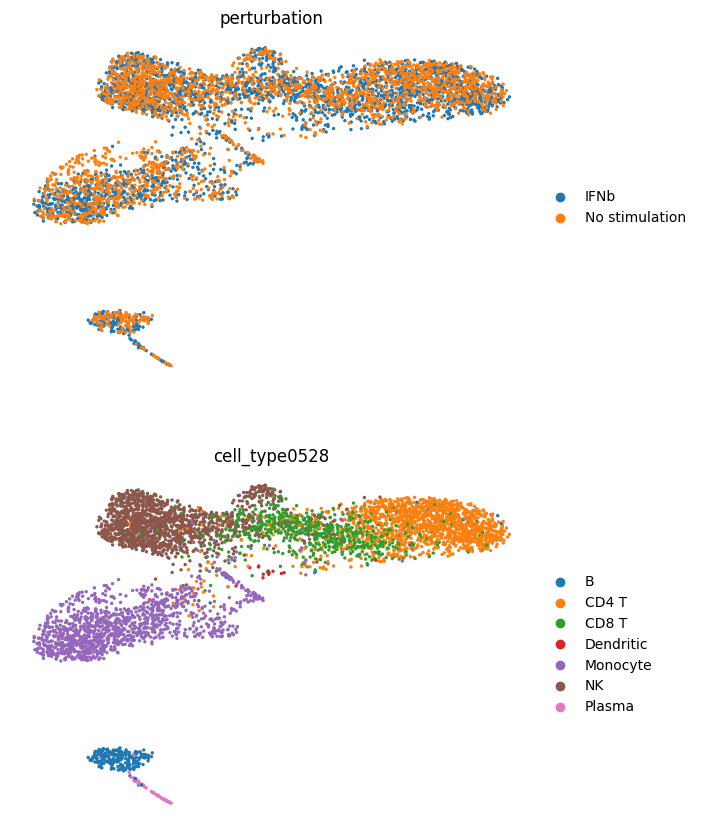

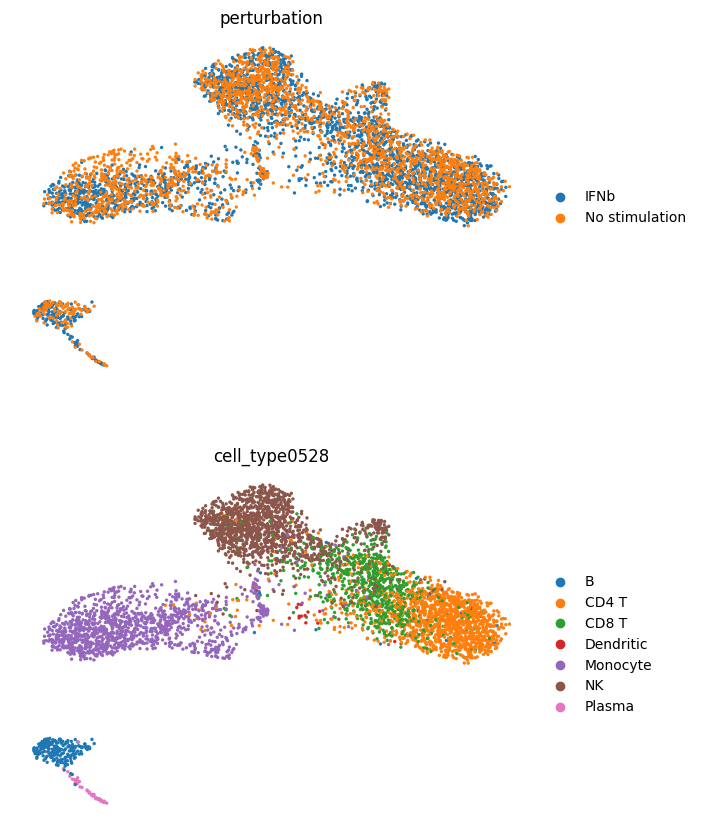

In [8]:
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type0528'], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type0528'], frameon=False, ncols=1)

In [9]:
import scanpy as sc
adata1=sc.read_h5ad("./PBMC_yale/adata.h5ad")
print(1)

import rpy2.robjects as robjects
import os
os.environ["R_HOME"]="/home/xx244/.conda/envs/benchmark/lib/R"
import anndata2ri
anndata2ri.activate()
'''
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path

from rpy2.robjects import r
r('.libPaths("/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3")')
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

# Set the library path
r('.libPaths("/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3")')

# Verify the updated library paths
print(r('.libPaths()'))
'''
from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type0528', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type0528', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


1


/tmp/ipykernel_2000359/580754678.py:9: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major relea

R_HOME is already set to: /home/xx244/.conda/envs/benchmark/lib/R


LISI---


cLISI, bLISI, LISI_F1 0.9565610457679882 0.8297156786136591 0.8886346514978216


ASW---
asw_label 0.6207614466547966


asw_batch 0.9398747928955468
kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 4


kbet_score 0.8938061350557139
graph_conn 0.984015385054638


NMI, ARI ---
NMI 0.6873908498792991
ARI 0.6961545020001987
positive and true positive rate---


                             ASW_label       ARI       NMI   1-cLISI  \
X_effect_modifier_space_PCA   0.620761  0.696155  0.687391  0.956561   

                                bLISI  ASW_batch  kBET Accept Rate  \
X_effect_modifier_space_PCA  0.829716   0.939875          0.893806   

                             graph connectivity  PCR_batch  pos rate  \
X_effect_modifier_space_PCA            0.984015   0.990051  0.872687   

                             true pos rate   F1 LISI  
X_effect_modifier_space_PCA       0.798289  0.888635  


In [10]:
import os
os.environ['LD_LIBRARY_PATH'] = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3:$LD_LIBRARY_PATH"
os.environ['R_HOME']="/home/xx244/.conda/envs/benchmark/lib/R"

# Proceed with importing R libraries using rpy2
from rpy2.robjects import r
r('''
    library(kBET)
    library(lisi)
''')


'lisi','kBET','tools',...,'datasets','methods','base'
